In [1]:
%load_ext autoreload
%autoreload 2


import sys
import healpy as hp
sys.path.append('/global/homes/l/lbigwood/S4Mock/')
#import mxxl_real
import glob
from astropy.table import vstack,Table,join
from fa_tools import fa_plot
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
from   desitarget.sv3.sv3_targetmask import desi_mask, bgs_mask, mws_mask, scnd_mask
import pylab as pl
import S4Mock_io
import mock_ledger
from desimodel.footprint import is_point_in_desi, tiles2pix
from desitarget.geomask import pixarea2nside

In [38]:
ledger = vstack([Table.read(x) for x in glob.glob('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/sv3/bright/initial/sv3mtl-bright-hp-*.ecsv')])

Requested fieldrot=2.0 arcsec delta=-0.0 arcsec
Requested fieldrot=2.0 arcsec delta=0.0 arcsec


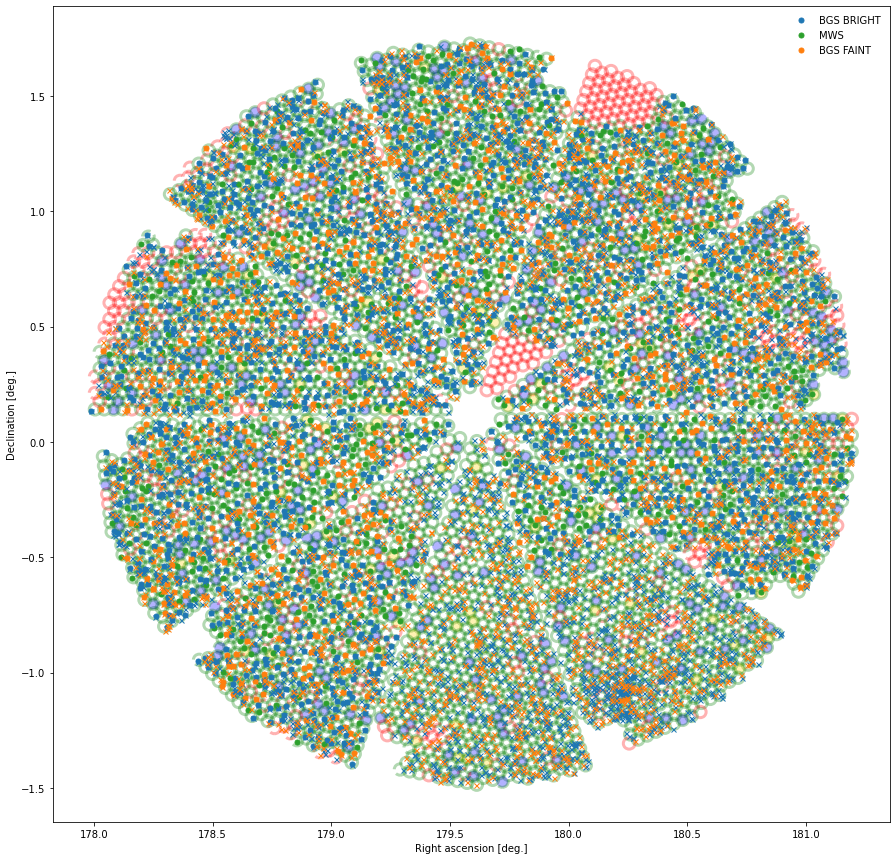

<Figure size 432x288 with 0 Axes>

In [3]:
fa_plot('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/20210406/fba-000039.fits',ledger)

In [13]:
p = fits.open('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/20210406/fba-000039.fits')
fassign = p['FASSIGN'].data
favail = p['FAVAIL'].data
ftargs = p['FTARGETS'].data

In [6]:
#target files produced by fiberassign
#targs = vstack([Table.read(x) for x in glob.glob('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/20210406/*-targ.fits')])

In [7]:
nights    = [x.split('/')[-1] for x in sorted(glob.glob('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3' + '/*'))]
nights

['20210406',
 '20210407',
 '20210408',
 '20210409',
 '20210410',
 '20210411',
 '20210412',
 '20210413',
 '20210414',
 '20210415',
 '20210416',
 '20210417',
 '20210418',
 '20210420',
 '20210422',
 '20210429']

In [39]:
favails= vstack([Table(fits.open(x)['FAVAIL'].data) for night in nights for x in glob.glob(f'/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/{night}/fba-*.fits')])

In [40]:
fbas = vstack([Table.read(x) for night in nights for x in glob.glob(f'/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/{night}/fba-*.fits')])

In [41]:
targs= vstack([Table.read(x) for night in nights for x in glob.glob(f'/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/{night}//*-targ.fits')])

In [11]:
#target files produced by fiberassign
#fbas = vstack([Table.read(x) for x in glob.glob('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/20210406/fba-*.fits')])

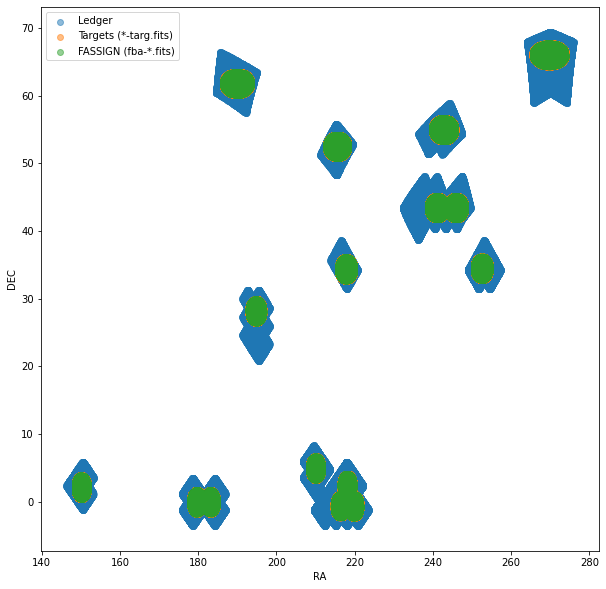

In [42]:
plt.figure(figsize=(10,10))


#plt.scatter(ftargs['TARGET_RA'],ftargs['TARGET_DEC'],label='FTARGETS (fba-000012.fits)', alpha=0.5)
plt.scatter(ledger['RA'],ledger['DEC'],label='Ledger', alpha=0.5)
plt.scatter(targs['RA'],targs['DEC'],label='Targets (*-targ.fits)', alpha=0.5)
plt.scatter(fbas['TARGET_RA'],fbas['TARGET_DEC'],label='FASSIGN (fba-*.fits)', alpha=0.5)
#plt.scatter(favail['RA'],favail['DEC'])

plt.xlabel('RA')
plt.ylabel('DEC')
#plt.xlim(170,190)
#plt.ylim(-5,5)
plt.legend()

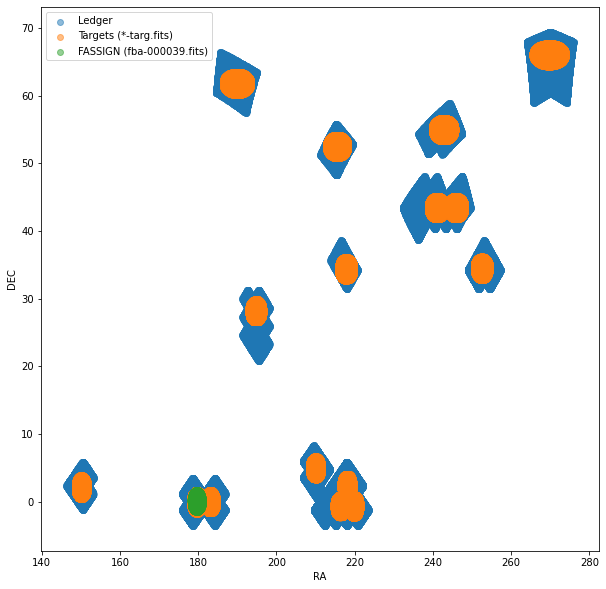

In [14]:
#same but for one fba file

plt.figure(figsize=(10,10))


#plt.scatter(ftargs['TARGET_RA'],ftargs['TARGET_DEC'],label='FTARGETS (fba-000012.fits)', alpha=0.5)
plt.scatter(ledger['RA'],ledger['DEC'],label='Ledger', alpha=0.5)
plt.scatter(targs['RA'],targs['DEC'],label='Targets (*-targ.fits)', alpha=0.5)
plt.scatter(fassign['TARGET_RA'],fassign['TARGET_DEC'],label='FASSIGN (fba-000039.fits)', alpha=0.5)

plt.xlabel('RA')
plt.ylabel('DEC')
#plt.xlim(170,190)
#plt.ylim(-5,5)
plt.legend()

In [77]:
"""
fba       = join(fassign,  ledger, keys='TARGETID', join_type='left')
favl      = join(favail, ledger, keys='TARGETID', join_type='left')

#checking same hp for tiles and ledger
from S4Mock_io import read_sv3tiles
tiles = read_sv3tiles()
hps       = geometry.radec2pix(tiles, unique=True, nside=32)
print(hps.data)

from geometry import radec2pix
pix = radec2pix(ledger)
np.unique(pix).data
"""

In [15]:
#checking whether fassign etc is in ledger
np.mean(np.in1d(fassign['TARGETID'],ledger['TARGETID']))
np.mean(np.in1d(favail['TARGETID'],ledger['TARGETID']))

0.10241378447369738

In [16]:
#shows how to load a zbest file 
x = np.loadtxt('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/20210408/zbest-20210408.txt')
Table(x)

col0,col1,col2,col3,col4,col5,col6
float64,float64,float64,float64,float64,float64,float64
150.18338221946973,0.6174839698407382,1.0,10.0,-1.0,0.0,14.0
149.98307124547748,0.6953661218335309,3.962780536065762e+16,1.0,-1.0,0.0,14.0
150.01560262852746,0.7622320311726333,3.9627805364846936e+16,1.0,-1.0,0.0,14.0
150.05164773555427,0.7188449002156928,3.962780536484769e+16,1.0,-1.0,0.0,14.0
150.07090580155003,0.6814054794357722,3.962780536484813e+16,1.0,-1.0,0.0,14.0
150.08984271365568,0.7263454922349547,3.962780536484859e+16,1.0,-1.0,0.0,14.0
150.1116427368599,0.8564555432519285,3.962780536484913e+16,1.0,-1.0,0.0,14.0
150.13271053055186,0.7761409328922929,3.9627805364849656e+16,1.0,-1.0,0.0,14.0
150.1569858989039,0.8183697001288422,3.962780536485019e+16,1.0,-1.0,0.0,14.0


In [18]:
from desimodel.footprint import is_point_in_desi, tiles2pix
from desitarget.geomask import pixarea2nside
import geometry

#read targets in 
#get tiles
tiles = S4Mock_io.read_sv3tiles()
# closest nside to DESI tile area of ~7 deg
nside = pixarea2nside(7.)
# ADM determine the pixels that touch the tiles.
pixlist = tiles2pix(nside, tiles=tiles)
#read in mxxl
mxxl =S4Mock_io.read_mxxl(small=False,nside=nside)
#read in our mxxl targets but having this nside and this pixlist 
targets = mxxl[np.in1d(mxxl['HPX'],pixlist)]
#restrict only to targets in the requested tiles...
ii = is_point_in_desi(tiles, targets["RA"], targets["DEC"])
targets = targets[ii]
#now get pixlist in nside=32
pix32 = geometry.radec2pix(targets,nside=32)
targets['HPX']=pix32

In [55]:
from desimodel.footprint import is_point_in_desi, tiles2pix
from desitarget.geomask import pixarea2nside
import geometry

#read targets in 
#get tiles
tiles = S4Mock_io.read_sv3tiles()
# closest nside to DESI tile area of ~7 deg
nside = pixarea2nside(7.)
# ADM determine the pixels that touch the tiles.
pixlist = tiles2pix(nside, tiles=tiles)
#read in mxxl
mxxl =S4Mock_io.read_mxxl(small=False,nside=nside)
#read in our mxxl targets but having this nside and this pixlist 
targets = mxxl[np.in1d(mxxl['HPX'],pixlist)]
#restrict only to targets in the requested tiles...
#ii = is_point_in_desi(tiles, targets["RA"], targets["DEC"])
#targets = targets[ii]
#now get pixlist in nside=32
pix32 = geometry.radec2pix(targets,nside=32)
targets['HPX']=pix32

In [53]:
tiles = S4Mock_io.read_sv3tiles()
np.sort(tiles['DONEFRAC']).data

array([0.9125, 0.9153, 0.9155, 0.9159, 0.9213, 0.9214, 0.9241, 0.93  ,
       0.9311, 0.936 , 0.9407, 0.9453, 0.9457, 0.9483, 0.955 , 0.9574,
       0.9597, 0.962 , 0.9629, 0.963 , 0.9631, 0.9668, 0.9716, 0.9753,
       0.9781, 0.9811, 0.9812, 0.9816, 0.9819, 0.9836, 0.9841, 0.9846,
       0.9859, 0.9867, 0.9889, 0.9907, 0.9967, 0.9977, 0.998 , 1.0014,
       1.0055, 1.0076, 1.0081, 1.0106, 1.0117, 1.0121, 1.0129, 1.0142,
       1.0145, 1.015 , 1.0201, 1.0213, 1.022 , 1.0243, 1.0246, 1.0263,
       1.0318, 1.0321, 1.0327, 1.0368, 1.0414, 1.0455, 1.0456, 1.0469,
       1.049 , 1.0499, 1.0502, 1.0514, 1.0517, 1.0536, 1.0555, 1.056 ,
       1.0578, 1.0593, 1.0621, 1.0625, 1.0625, 1.0649, 1.0657, 1.0663,
       1.0668, 1.0724, 1.0726, 1.0743, 1.0756, 1.0776, 1.0797, 1.083 ,
       1.0849, 1.0854, 1.0856, 1.0891, 1.0894, 1.0908, 1.0919, 1.0921,
       1.0932, 1.0938, 1.0955, 1.1001, 1.1005, 1.1007, 1.101 , 1.1035,
       1.1052, 1.1058, 1.1075, 1.1096, 1.1127, 1.1169, 1.1169, 1.1236,
      

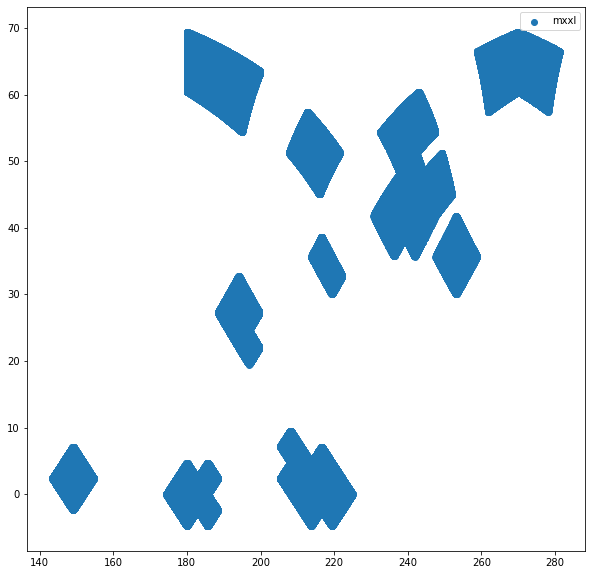

In [56]:
#compare whole mxxl and a particular fba file 
plt.figure(figsize=(10,10))
plt.scatter(targets['RA'],targets['DEC'],label='mxxl')
#plt.scatter(ftargs['TARGET_RA'],ftargs['TARGET_DEC'],label= 'FTARGET: fba-000039.fits')
plt.legend()

In [83]:
#sv3 pix now more accurate as not just using central ra and dec 
pix4ledger = geometry.radec2pix(targets,nside=32,unique=True).data
pix4ledger

array([2286, 2287, 2333, 2334, 2335, 2356, 2357, 2376, 2378, 2400, 2447,
       2453, 2454, 2455, 2457, 2458, 2459, 2460, 2461, 2462, 2469, 2471,
       2480, 2481, 2482, 2483, 2484, 2495, 2496, 2498, 2504, 2536, 2537,
       2538, 2539, 2549, 2551, 2557, 2559, 2592, 2594, 2595, 2600, 2601,
       2602, 2628, 2629, 2630, 2631, 2679, 2685, 2803, 2806, 2807, 2809,
       2812, 2813, 2837, 2850, 2851, 2856, 2857, 2880, 2881, 2901, 2903,
       2978, 2984, 3834, 3835, 3838, 3839, 4010, 4011, 6398, 6399, 6477,
       6478, 6479, 6481, 6482, 6483, 6484, 6486, 6488, 6489, 6490, 6491,
       6492, 6493, 6494, 6495, 6500, 6501, 6503, 6509, 6511, 6512, 6513,
       6516, 6517, 6520, 6521, 6522, 6523, 6562, 6563, 6568, 6569, 6570,
       6571, 6572, 6574, 6608, 6609, 6740, 6741, 6743, 6809, 6811, 6812,
       6814, 6815, 6833, 6836, 6837, 6912, 6914, 7006, 7007, 7028, 7029,
       7030, 7031, 7037])

In [84]:
#creating ledger so lets not do this again
"""
for i in range(len(pix4ledger)):
    mock_ledger.create_mock_ledger_hp(outdir='/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2', healpix=pix4ledger[i], mxxl=targets, overwrite=False)
"""

Selected 0.327 as BGS Bright
Check: 0.039
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv3mtl-bright-hp-2286.ecsv
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv3zs-bright-hp-2286.ecsv
Selected 0.314 as BGS Bright
Check: 0.040
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv3mtl-bright-hp-2287.ecsv
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv3zs-bright-hp-2287.ecsv
Selected 0.293 as BGS Bright
Check: 0.031
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv3mtl-bright-hp-2333.ecsv
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv3zs-bright-hp-2333.ecsv
Selected 0.331 as BGS Bright
Check: 0.036
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv3mtl-bright-hp-2334.ecsv
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv3zs-bright-hp-2334.ecsv
Selected 0.341 as BGS Bright
Check: 0.037
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv

In [54]:
import os.path



tiles = S4Mock_io.read_sv3tiles()
rosettes = np.unique(tiles['ROSETTE']).data
for i in range(len(rosettes)):
    tiles_for_rosette = np.unique(tiles[(tiles['ROSETTE']==rosettes[i])]['TILEID']).data
    print('Rosette {} tiles:{}'.format(rosettes[i],tiles_for_rosette))
    for j in range(len(tiles_for_rosette)):
        test = []
        for k in range(len(nights)):
            if os.path.exists('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/' +nights[k] +'/fba-{:06}.fits'.format(tiles_for_rosette[j])) == True:
                test.append(1)
            else:
                continue
        if len(test)==1:
            continue
        else:
            print('Rosette {} incomplete: no tile {}'.format(rosettes[i],tiles_for_rosette[j]))

    

Rosette 0 tiles:[12 13 14 15 16 17 18 19 20 21]
Rosette 0 incomplete: no tile 19
Rosette 0 incomplete: no tile 20
Rosette 0 incomplete: no tile 21
Rosette 1 tiles:[39 40 41 42 43 44 45 46 47 48 49]
Rosette 1 incomplete: no tile 47
Rosette 1 incomplete: no tile 48
Rosette 1 incomplete: no tile 49
Rosette 2 tiles:[66 67 68 69 70 71 72 73 74 75 76]
Rosette 2 incomplete: no tile 71
Rosette 2 incomplete: no tile 72
Rosette 2 incomplete: no tile 73
Rosette 2 incomplete: no tile 74
Rosette 2 incomplete: no tile 75
Rosette 2 incomplete: no tile 76
Rosette 3 tiles:[ 93  94  95  96  97  98  99 100 101 102 103]
Rosette 3 incomplete: no tile 99
Rosette 3 incomplete: no tile 100
Rosette 3 incomplete: no tile 101
Rosette 3 incomplete: no tile 102
Rosette 3 incomplete: no tile 103
Rosette 4 tiles:[120 121 122 123 124 125 126 127 128 129]
Rosette 4 incomplete: no tile 125
Rosette 4 incomplete: no tile 126
Rosette 4 incomplete: no tile 127
Rosette 4 incomplete: no tile 128
Rosette 4 incomplete: no tile

In [22]:
whole_ledger = vstack([Table.read(x) for x in glob.glob('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/sv3/bright/sv3mtl-bright-hp-*.ecsv')])

In [24]:
init_ledger = vstack([Table.read(x) for x in glob.glob('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/sv3/bright/initial/sv3mtl-bright-hp-*.ecsv')])

In [43]:
is_mws= ((init_ledger['SV3_DESI_TARGET'].data & desi_mask['MWS_ANY']) != 0)
is_bgs= ((init_ledger['SV3_DESI_TARGET'].data & desi_mask['BGS_ANY']) != 0)
mws = init_ledger[is_mws]
bgs = init_ledger[is_bgs]


In [30]:
real_ledger = vstack([Table.read(x) for x in glob.glob('/global/cscratch1/sd/mjwilson/S4MOCK/SV3REAL/SV3REALLEDGER/bright/sv3mtl-bright-hp-*.ecsv')])

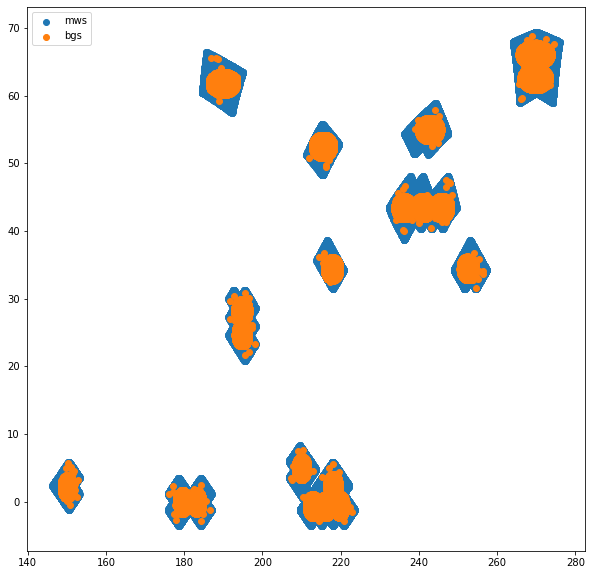

In [45]:
#compare whole mxxl and a particular fba file 
plt.figure(figsize=(10,10))

plt.scatter(mws['RA'].data,mws['DEC'].data,label='mws')
plt.scatter(bgs['RA'].data,bgs['DEC'].data,label='bgs')


plt.legend()

In [47]:
is_mws= ((real_ledger['SV3_DESI_TARGET'].data & desi_mask['MWS_ANY']) != 0)
is_bgs= ((real_ledger['SV3_DESI_TARGET'].data & desi_mask['BGS_ANY']) != 0)
mws = real_ledger[is_mws]
bgs = real_ledger[is_bgs]


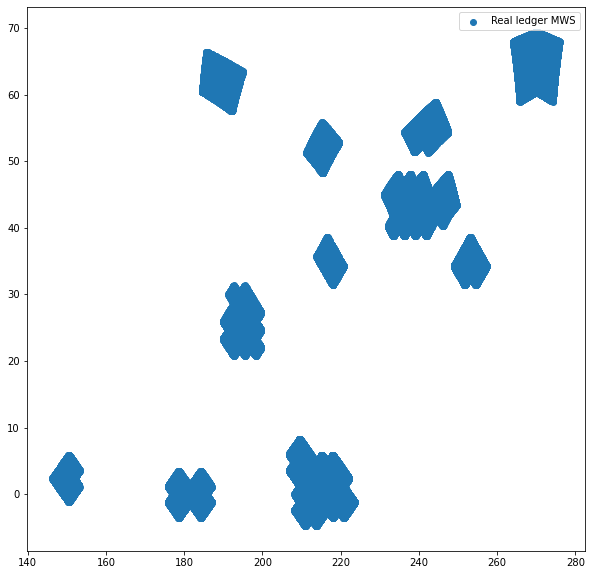

In [49]:
#compare whole mxxl and a particular fba file 
plt.figure(figsize=(10,10))

plt.scatter(mws['RA'].data,mws['DEC'].data,label='Real ledger MWS')
#plt.scatter(bgs['RA'].data,bgs['DEC'].data,label='Real ledger BGS')


plt.legend()

In [ ]:
S4Mock_io